In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

#### Check data

In [4]:
# Chuyển cột date sang kiểu dữ liệu datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
cate_cols = df.select_dtypes(include='object').columns
cate_cols

Index(['street', 'city', 'statezip', 'country'], dtype='object')

In [8]:
num_cols = df.select_dtypes(include=[int, float]).columns
num_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

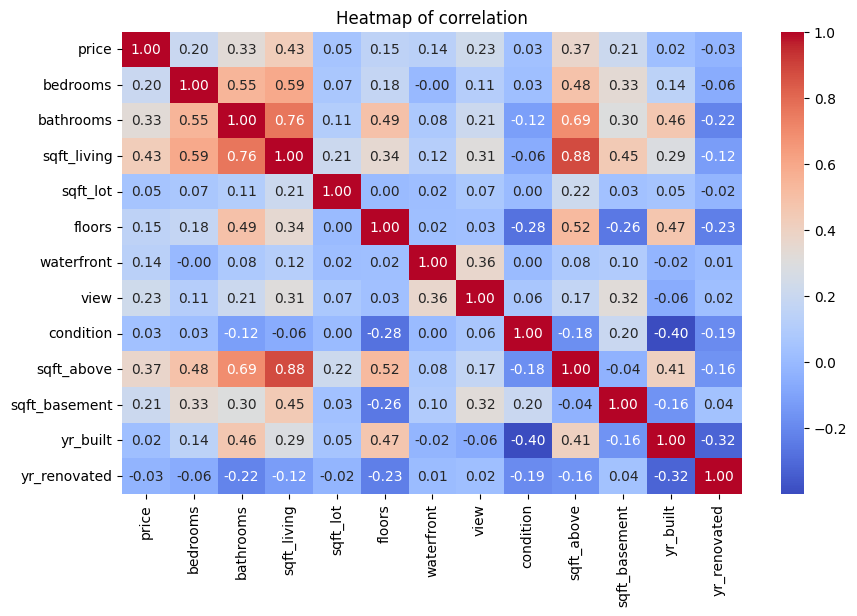

In [9]:
# Vẽ heatmap cho df 
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of correlation')
plt.show()

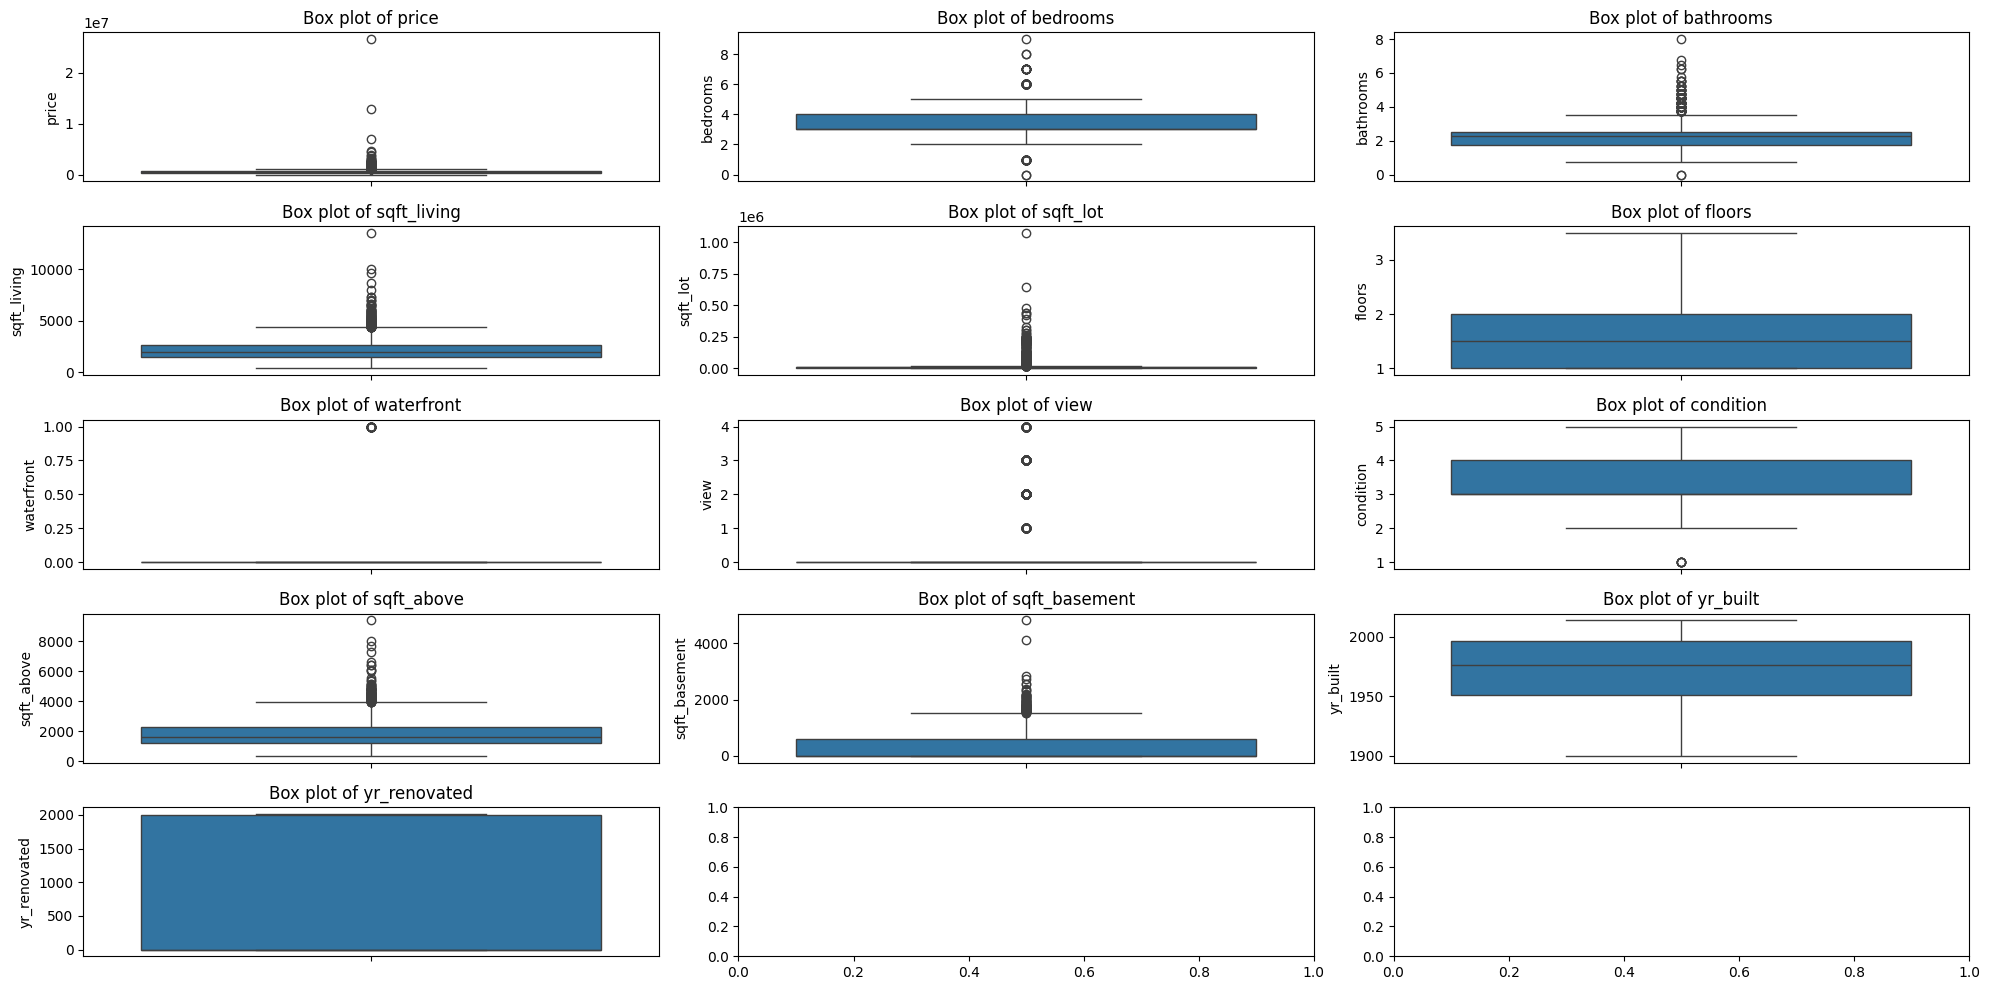

In [10]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

## EDA

#### Univariate Analysis

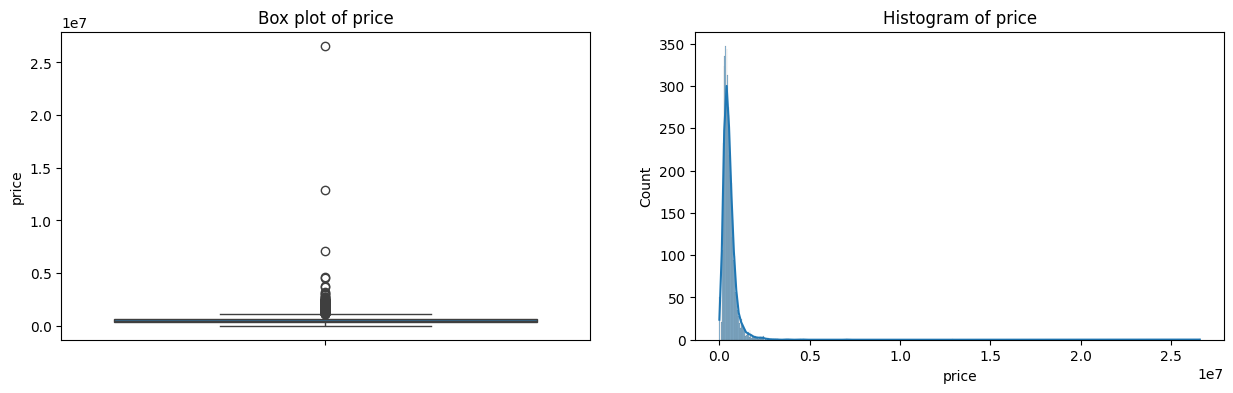

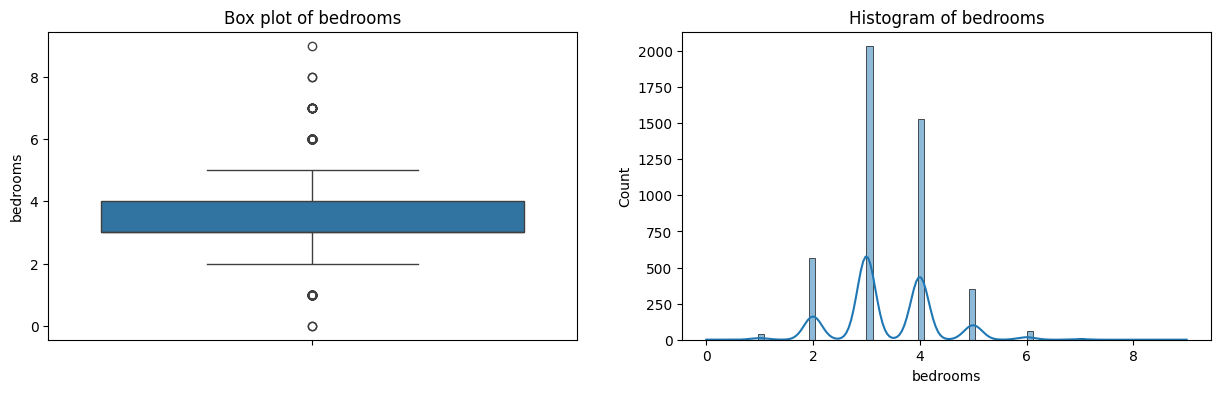

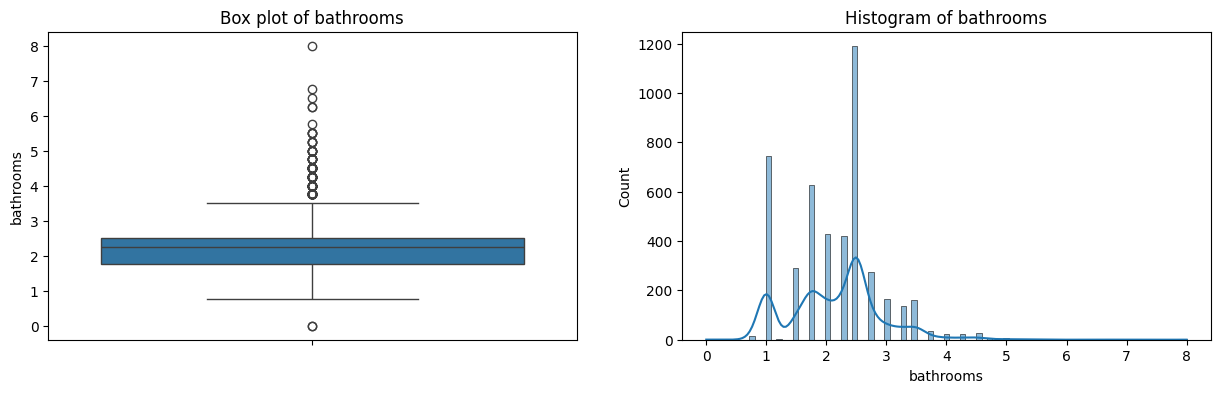

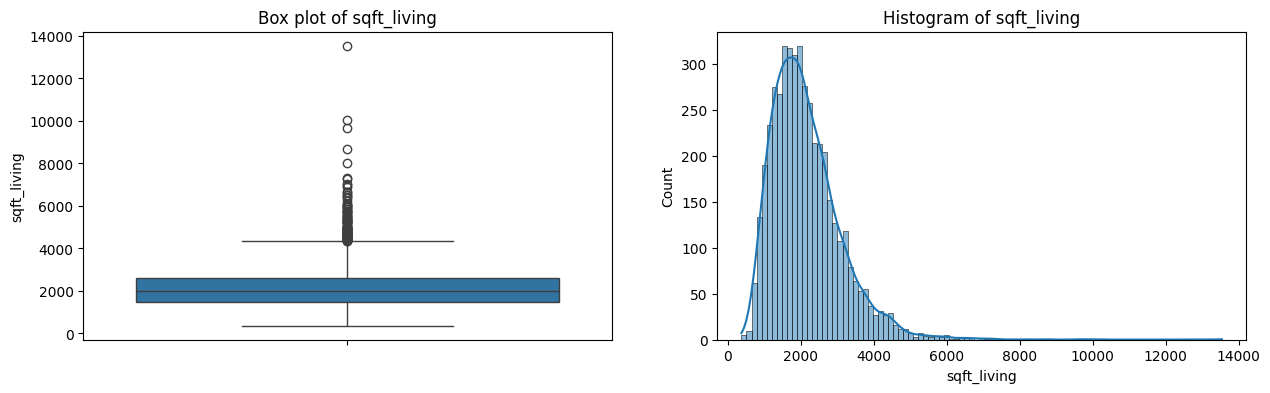

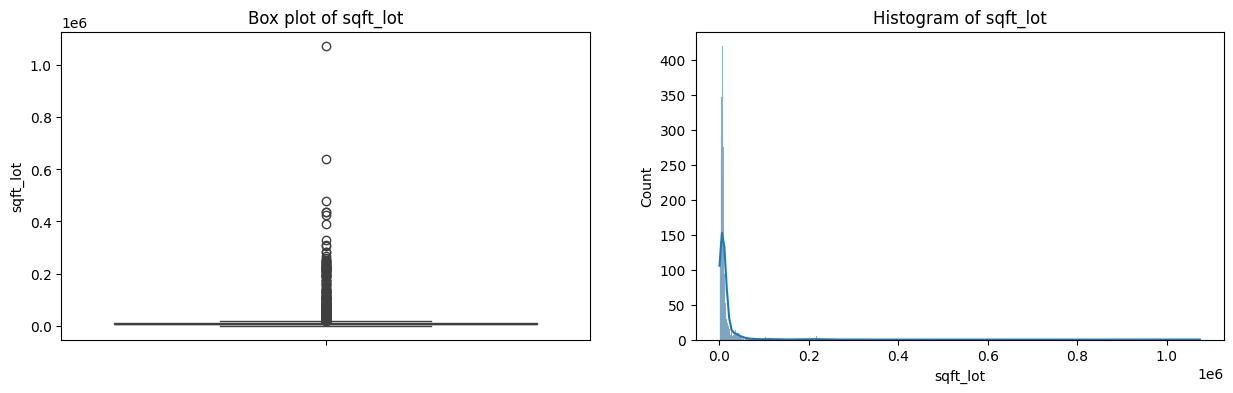

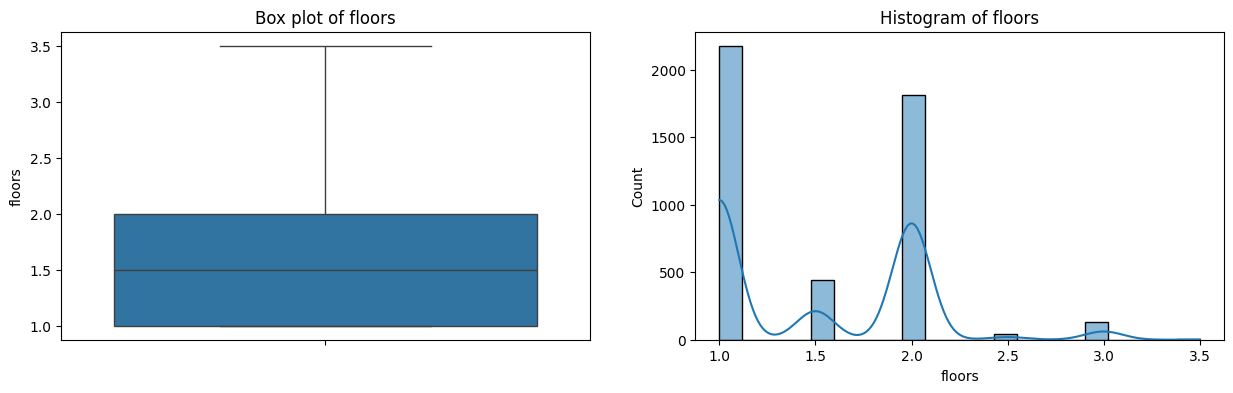

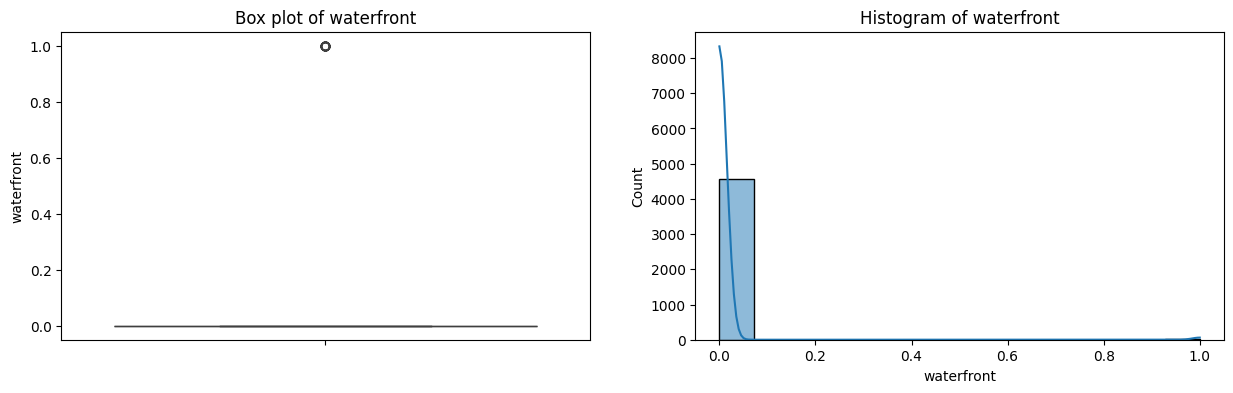

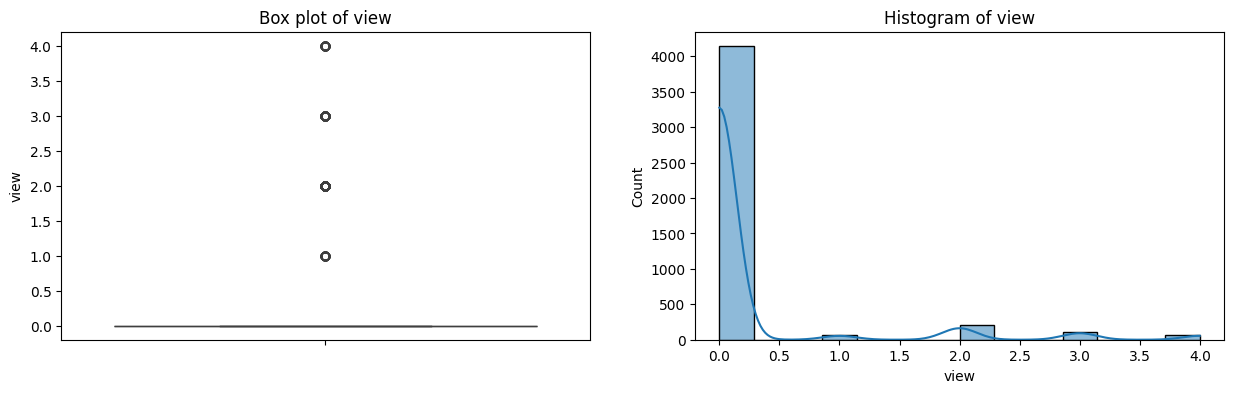

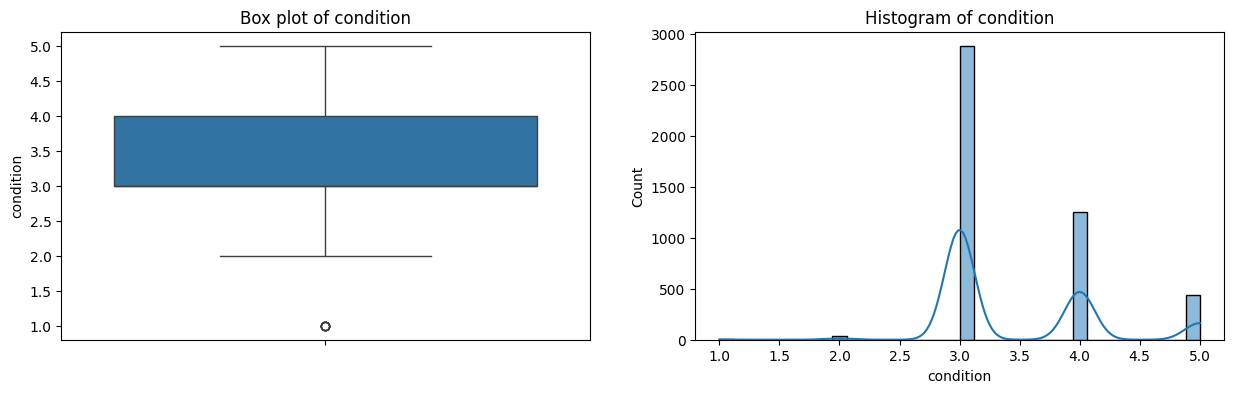

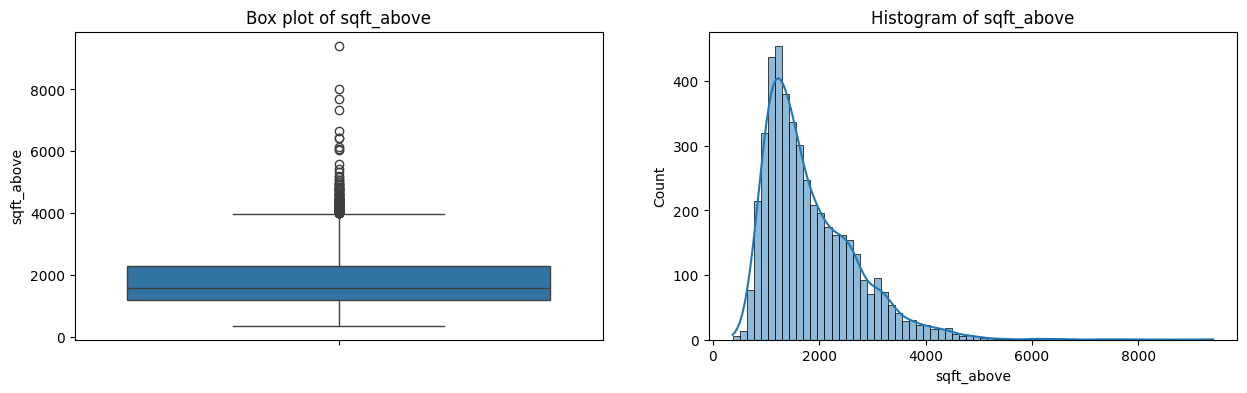

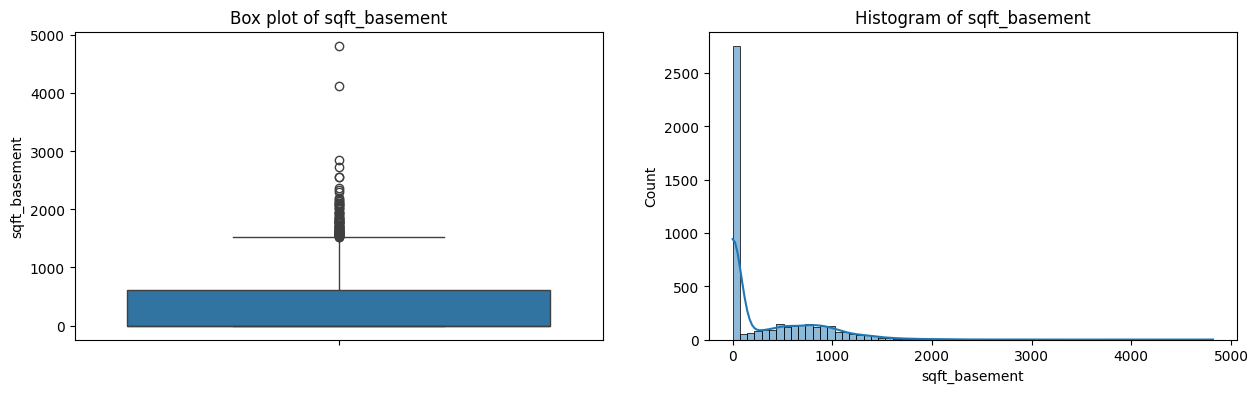

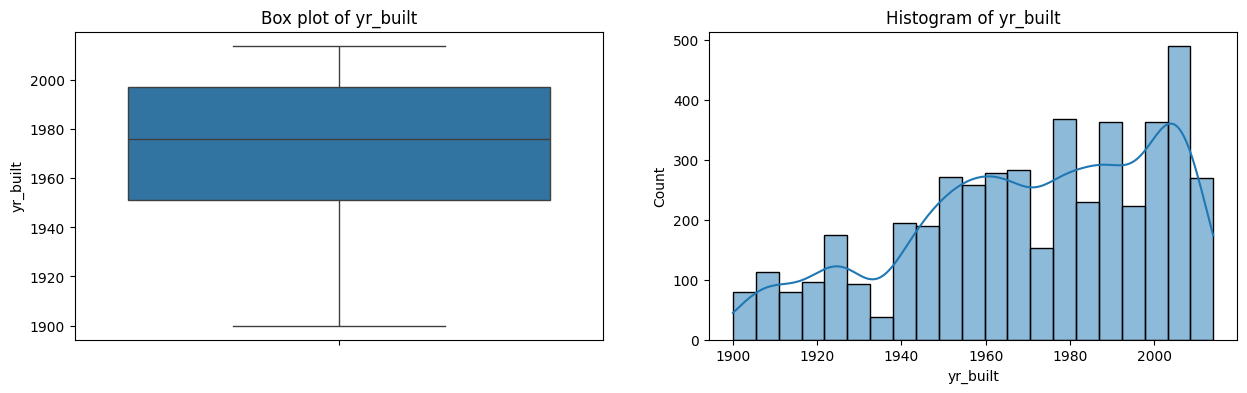

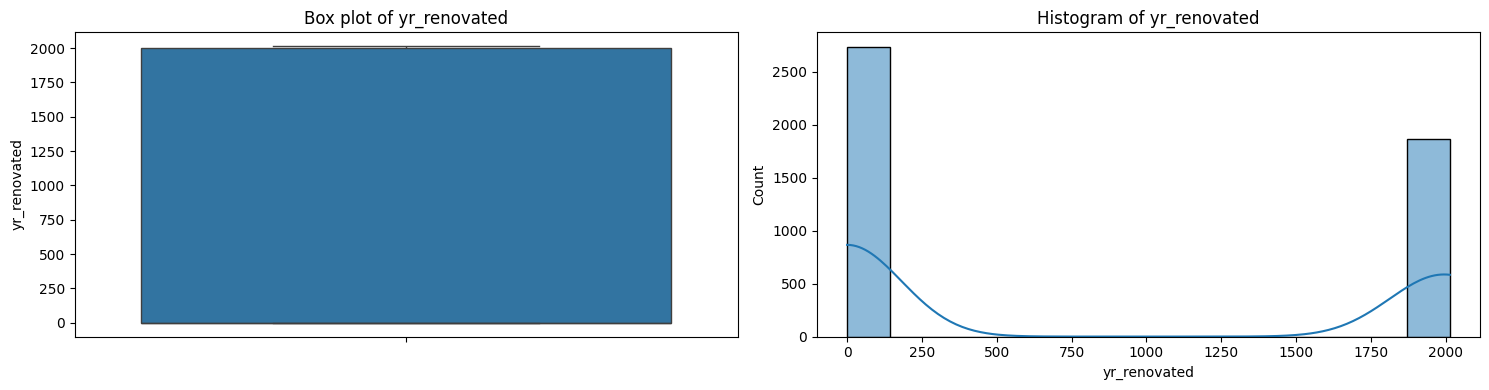

In [11]:
# Vẽ box plot và hist plot cho num_cols

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    axes = axes.ravel()
    for i in range(2):
        if i == 0:
            sns.boxplot(df[col], ax=axes[i])
            axes[i].set_title(f'Box plot of {col}')
        else:
            sns.histplot(df[col], ax=axes[i], kde=True)
            axes[i].set_title(f'Histogram of {col}')
    
plt.tight_layout()
plt.show()

In [12]:
cate_cols

Index(['street', 'city', 'statezip', 'country'], dtype='object')

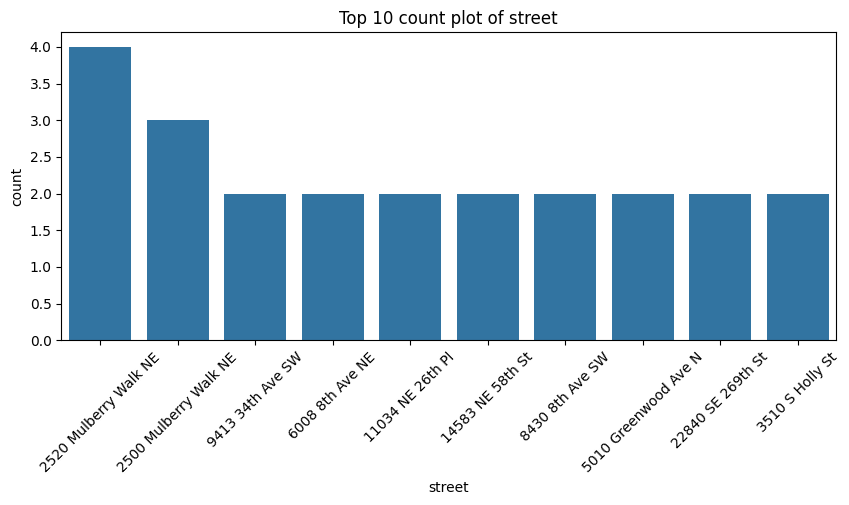

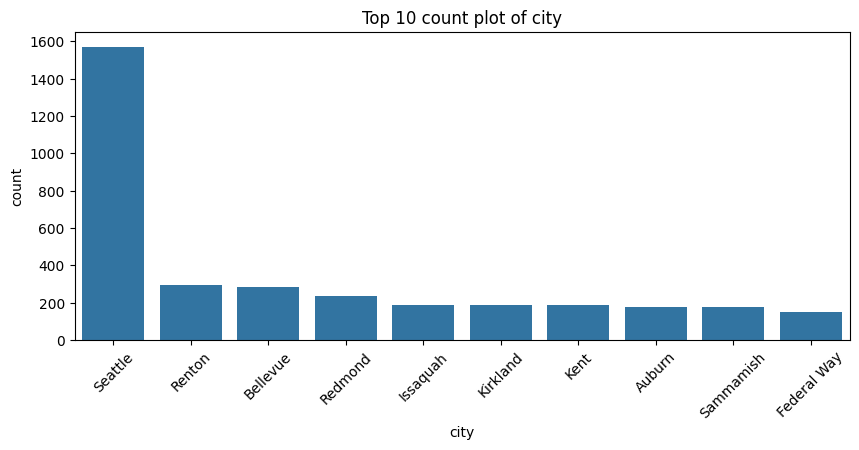

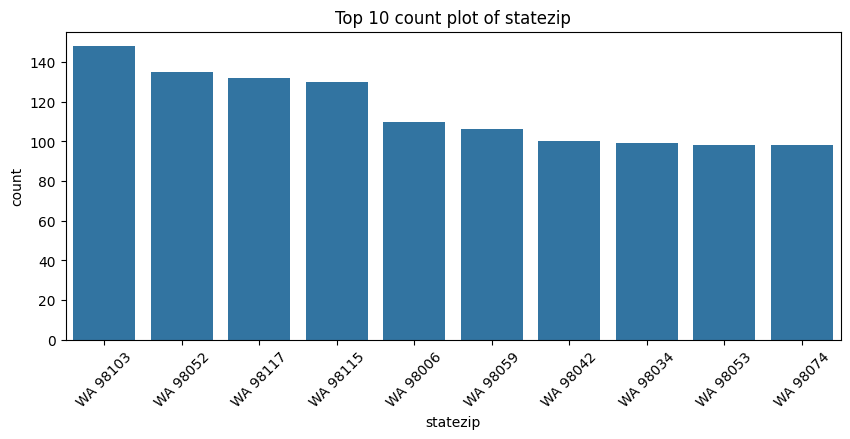

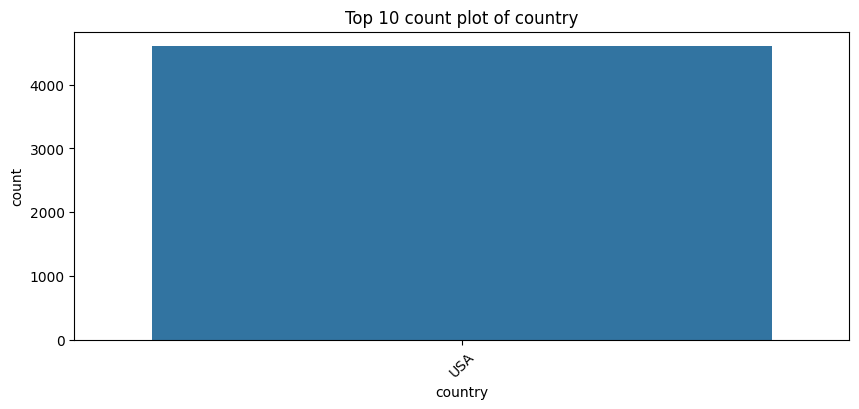

In [13]:
# Vẽ count plot top 10 cho cate_cols
for col in cate_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10])
    plt.title(f'Top 10 count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

#### Bivariate Analysis

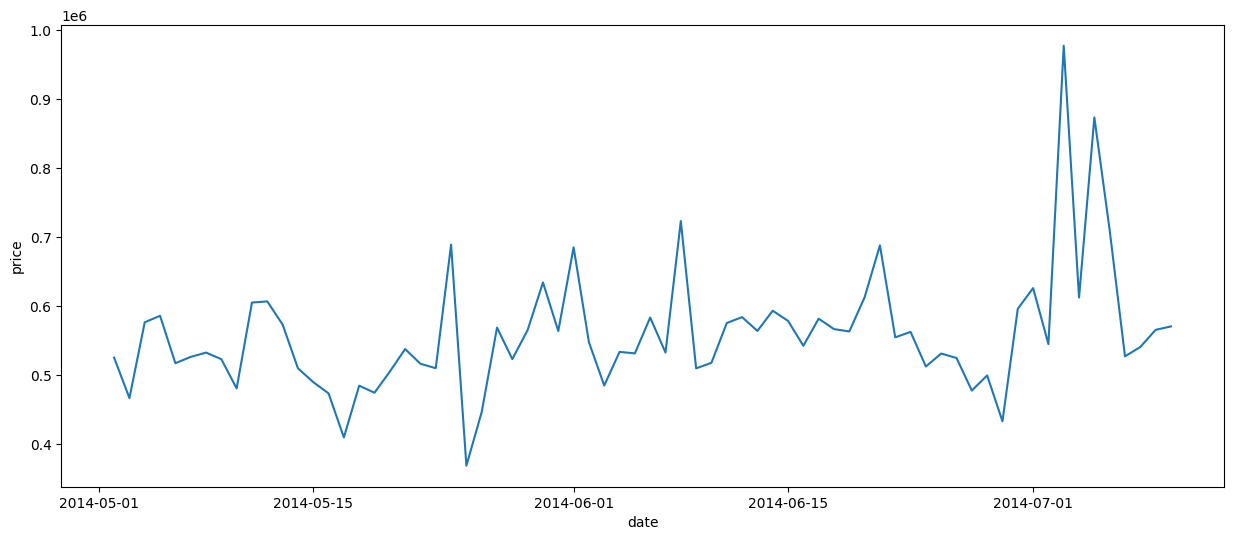

In [14]:
# Vẽ price theo date
import datetime as dt
plt.figure(figsize=(15, 6))
sns.lineplot(x=df['date'], y=df['price'], errorbar=None)
plt.show()

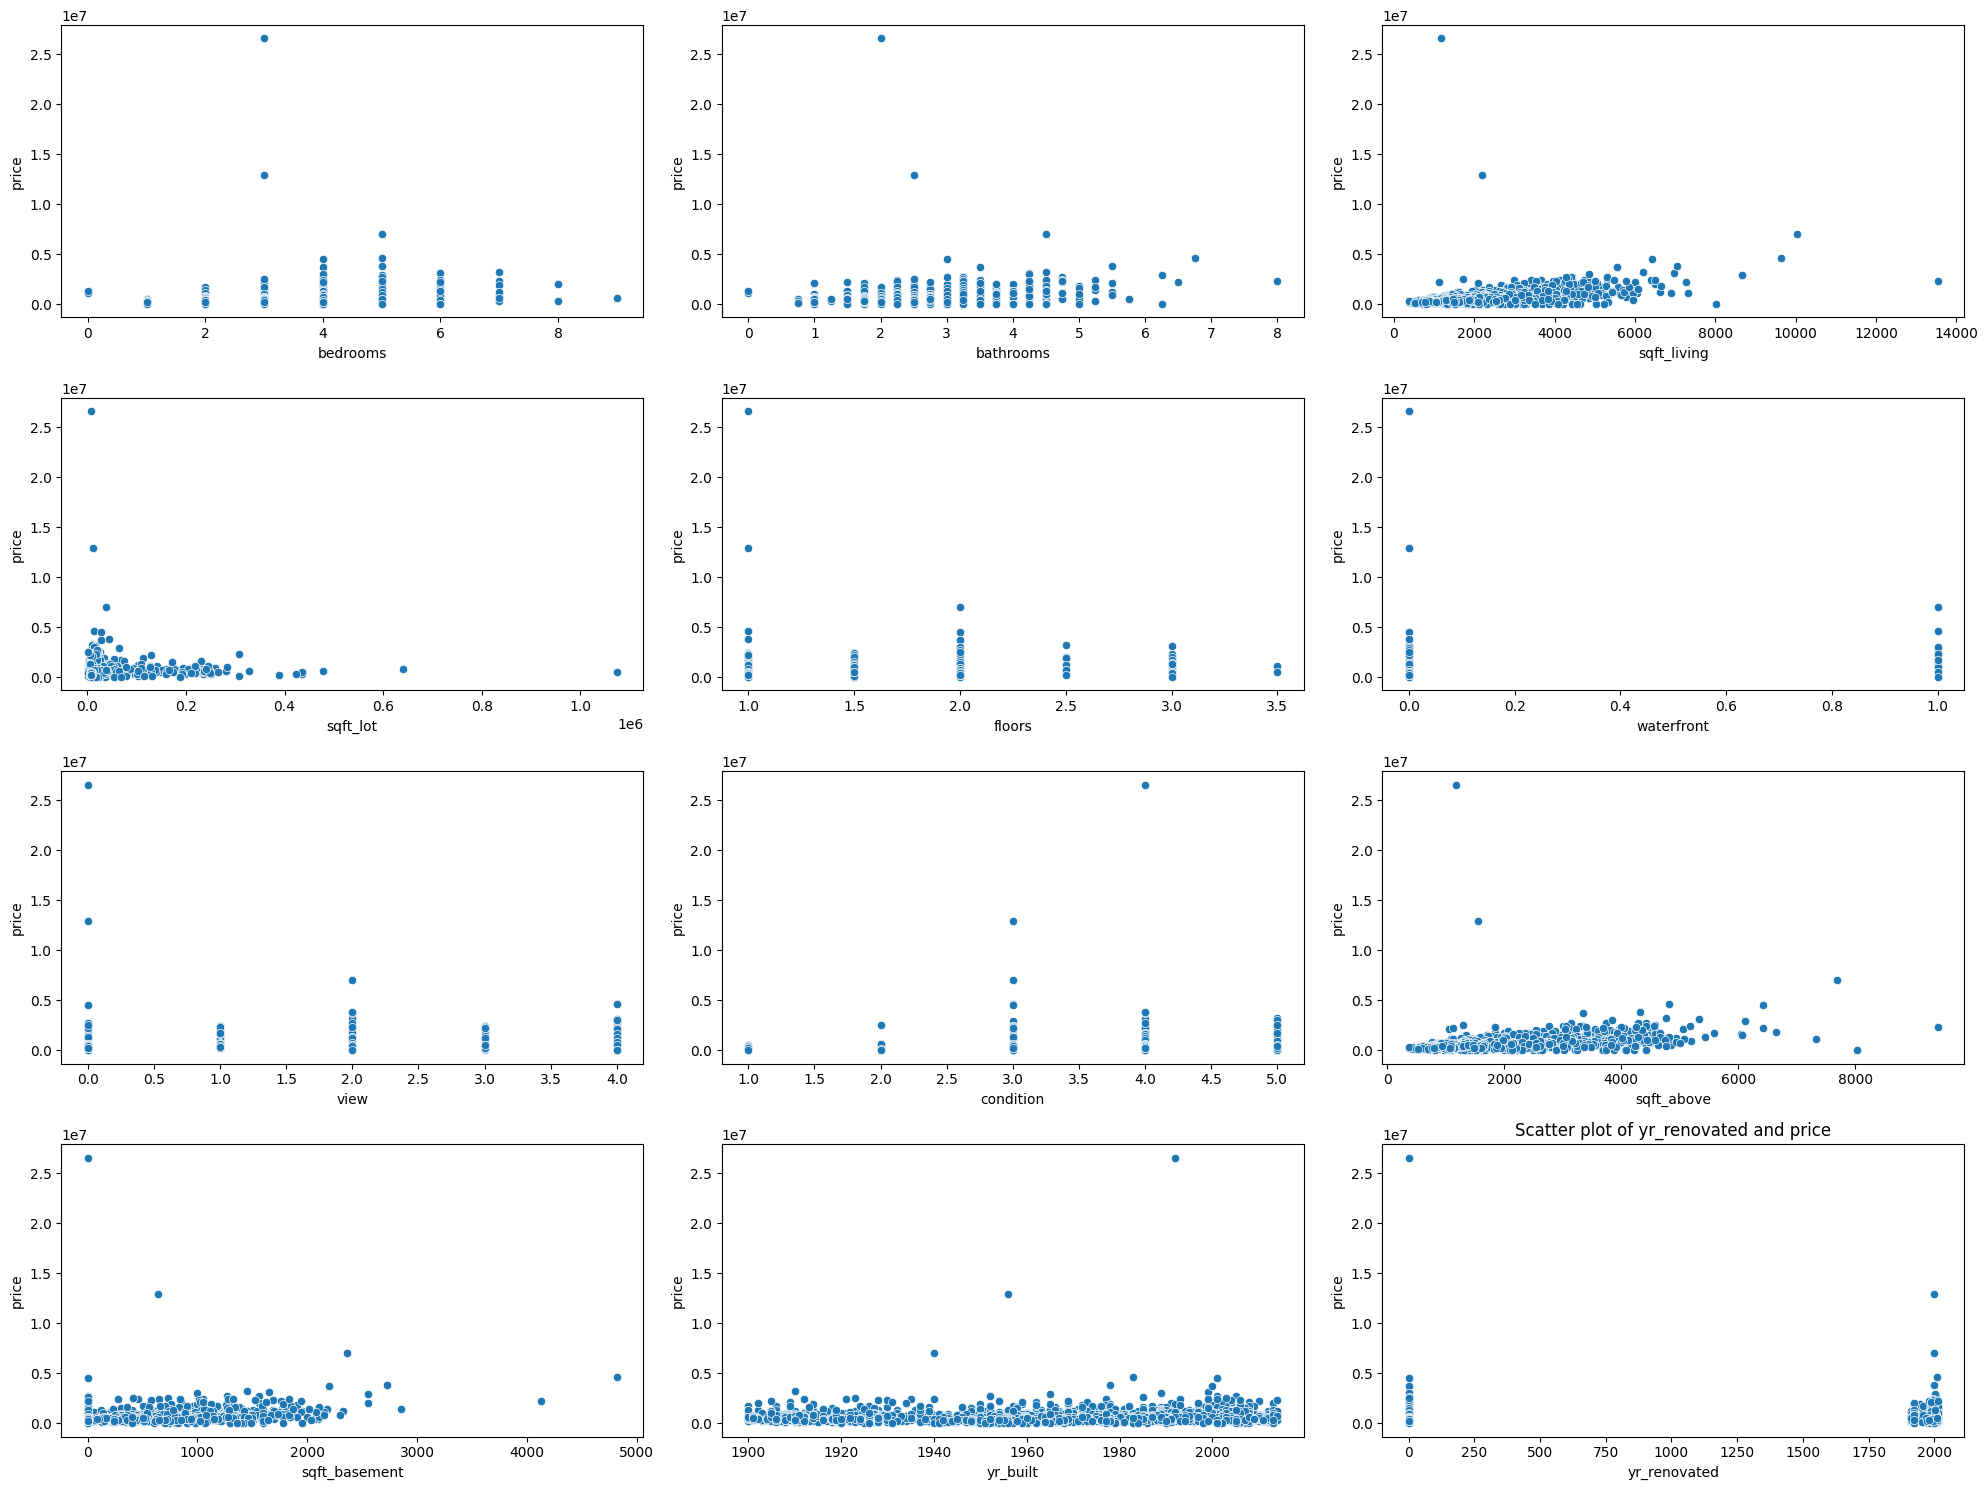

In [15]:
# Vẽ bivariate cho price và các cột num_cols
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(num_cols[1:]):
    sns.scatterplot(x=col, y='price', data=df, ax=axes[i])
    plt.title(f'Scatter plot of {col} and price')

plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
df_train = df.copy()
df_train = df_train.drop(columns='country')

In [18]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [19]:
# Mã hóa cột cate_cols
le = LabelEncoder()
for col in cate_cols[:-1]:
    df_train[col] = le.fit_transform(df_train[col])

In [20]:
# scaler dữ liệu
scaler = StandardScaler()
df_train[num_cols[1:]] = scaler.fit_transform(df_train[num_cols[1:]])

In [21]:
# tính correlation với price
correlation = df_train.corr()
correlation['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
date             0.033906
street           0.029366
yr_built         0.021857
city             0.018625
yr_renovated    -0.028774
statezip        -0.043385
Name: price, dtype: float64

In [22]:
# thêm cột ngày, tháng, năm vào df_train
df_train['day'] = df_train['date'].dt.day
df_train['month'] = df_train['date'].dt.month

In [23]:
# train model
X = df_train.drop(columns=['date', 'price'])
y = df_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,day,month
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,1522,36,62,2,5
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,3899,35,58,2,5
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,2291,18,26,2,5
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,4263,3,7,2,5
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,4352,31,31,2,5


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Đánh giá model
y_pred = model.predict(X_test)

print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('R2 score: ', r2_score(y_test, y_pred))

Mean squared error:  66129213021.578026
Mean absolute error:  161524.77771604556
R2 score:  0.5530252253139241


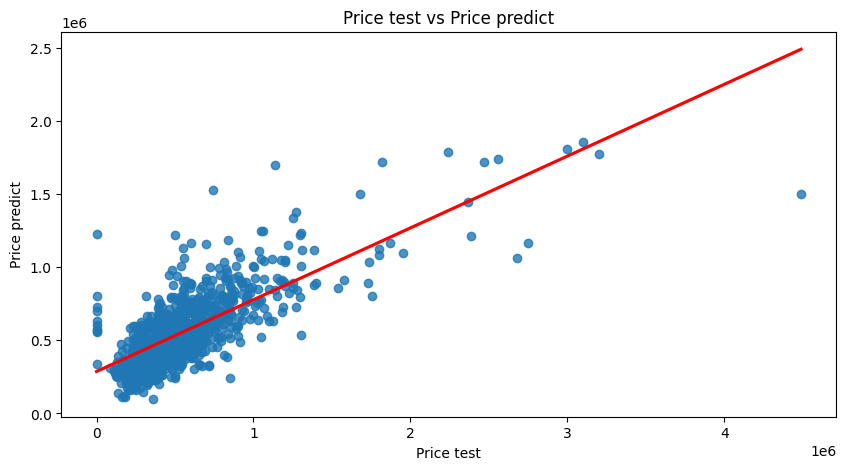

In [27]:
# Vẽ scatter plot giữa giá thực và giá dự đoán bằng regplot
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color': 'red'})
plt.xlabel('Price test')
plt.ylabel('Price predict')
plt.title('Price test vs Price predict')
plt.show()

### => model dự đoán hiệu quả các giá trị của price từ các biến độc lập

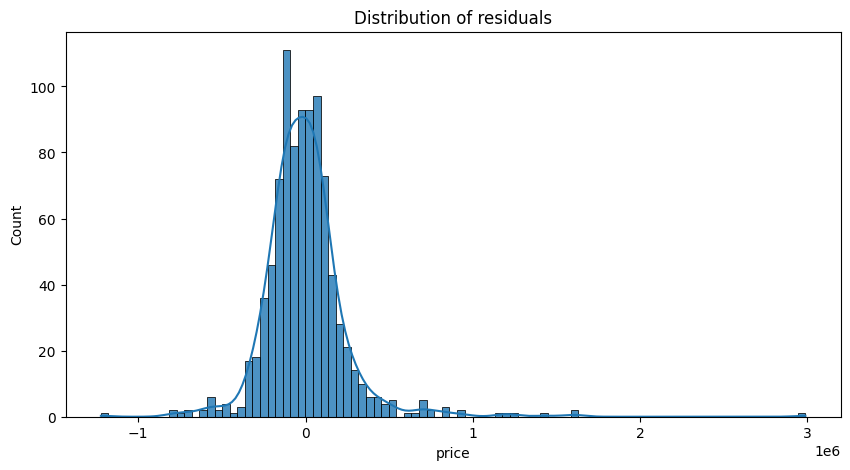

In [28]:
# Vẽ distribution của residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, alpha=0.8)
plt.title('Distribution of residuals')
plt.show()

### => Phân phối của residuals xấp xỉ chuẩn. Residuals biểu thị phương sai của biến kết quả mà model không giải thích được. Phân phối chuẩn quanh số 0 là tốt, vì nó chứng tỏ rằng các sai số của model được phân bổ đồng đều và không bias.

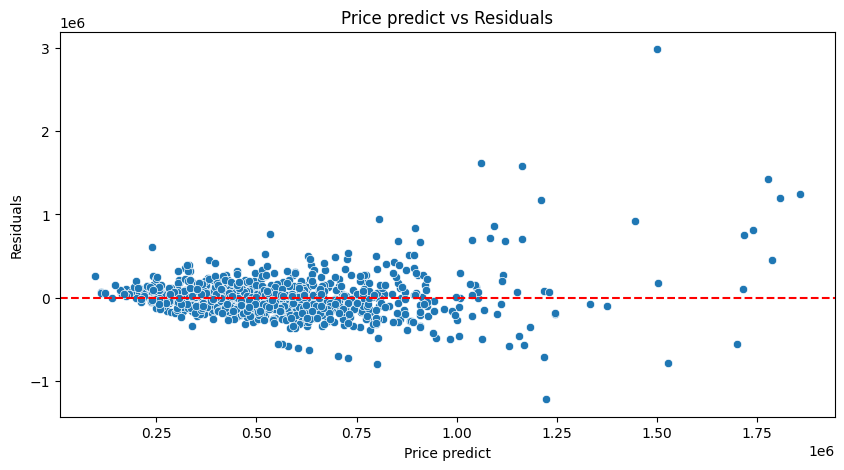

In [29]:
# Vẽ scatter plot giữa giá trị dự đoán và residuals
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Price predict')
plt.ylabel('Residuals')
plt.title('Price predict vs Residuals')
plt.show()

### => Residuals phân bổ đều trên và dưới 0, model có xu hướng dự đoán gần giá trị thực tế

In [30]:
# Hệ số của các features
coefficients = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})
coefficients.sort_values(by='coefficient', ascending=False)

,feature,coefficient
2,sqft_living,117550.481166
8,sqft_above,104745.626914
1,bathrooms,51483.782864
9,sqft_basement,49375.497216
6,view,38821.179502
5,waterfront,24764.805155
7,condition,22797.203426
16,month,22094.919110
4,floors,12599.471770
11,yr_renovated,7932.593954
